### Introduction

This notebook contains training dataset exploratory data analysis for mobile phones price classification task.
<br>Data preprocessing and classification task is carried out in "classification_v1.ipynb" 

Dataset attributes:
1. **id:** unique identifier
2. **battery_power:** total energy a battery can store in one time measured in mAh
3. **blue:** whether mobile has bluetooth
4. **clock_speed:** speed at which microprocessor executes instructions
5. **dual_sim:** whether mobile has dual sim
6. **fc:** front camera mega pixels
7. **four_g:** whether mobile has 4G
8. **int_memory:** internal memory in gigabytes
9. **m_dep:** mobile depth in cm
10. **mobile_wt:** mobile weight
11. **n_cores:** number of cores of processor
12. **pc:** primary camera mega pixels
13. **px_height:** pixel resolution height
14. **px_width:** pixel resolution width
15. **ram:** ram in mb
16. **sc_h:** screen height of mobile in cm
17. **sc_w:** screen width of mobile in cm
18. **talk_time:** longest time that a single battery charge will last when talking
19. **three_g:** whether mobile has 3G
20. **touch_screen:** whether mobile has touch_screen
21. **wifi:** whether mobile has wifi
22. **price_range:** target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



**Due to cropped graph bug in 3.1.1 install matplotlib 3.1.2 if not installed:**
<br>%pip install matplotlib==3.1.2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

module_path = os.path.abspath(os.path.join('./src/'))
module_path
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import categorical_vs_target_rep, z_score_outliers, iqr_outliers

warnings.simplefilter (action = 'ignore')
pd.set_option('display.max_columns', 22)

***
#### Load data
***

In [3]:
data_df = pd.read_csv('data/train.csv')
data_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


#### Check for missing values

In [5]:
data_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

***
#### Check for duplicates
***

In [6]:
data_df.duplicated().sum()

0

***
#### Check numbers of unique values per each attribute
***

In [7]:
data_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

***
#### Describe dataset
***

In [8]:
data_df.describe().T.round({'count': 0,
                            'mean': 2,
                            'std': 2,
                            'min': 2,
                            '25%': 2,
                            '50%': 2,
                            '75%': 2,
                            'max': 2})

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.52,439.42,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.50,0.50,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52,0.82,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.51,0.50,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.31,4.34,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52,0.50,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.05,18.15,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50,0.29,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.25,35.40,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52,2.29,1.0,3.00,4.0,7.00,8.0


In descriptive statistics some values from "min" column seem to be suspicious:
* **px_height:** pixel resolution height could not be 0 cm or even close to 0 cm
* **sc_w:** screen width of mobile could not be 0 cm or even close to 0 cm

Columns **fc and px_height** probably will have outliers as "max" value lies far from agerages


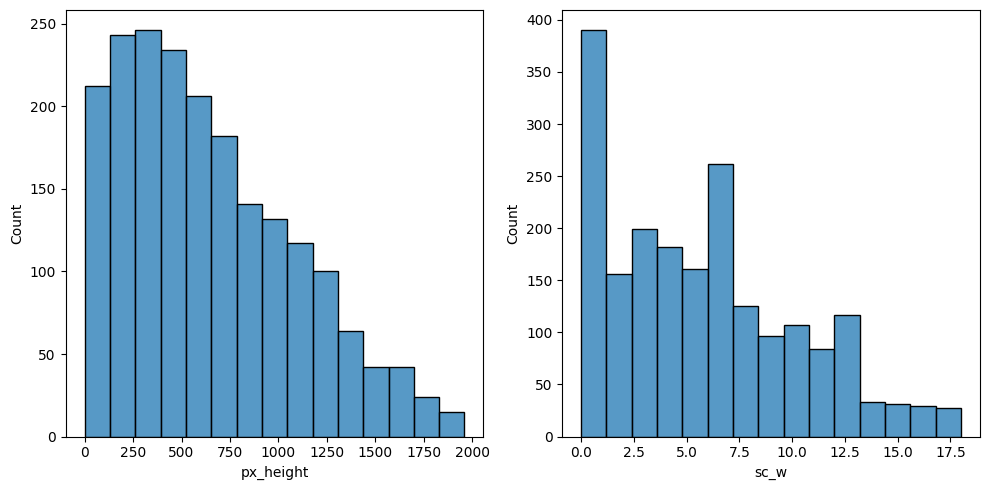

In [9]:
viz_df = data_df[['px_height', 'sc_w']]

num_columns = len(viz_df.columns)
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs = axs.flatten()

for i, col in enumerate(viz_df.columns):
   sns.histplot(ax=axs[i], data=viz_df[col], bins=15)

plt.tight_layout()
plt.show()

There are many values close to 0 for both 'px_height' and 'sc_w' columns. 
<br>It might be better to remove either columns 'px_height' and 'sc_w' or its rows that are close to 0.

***
### Check correlation
***

In [10]:
corr_check_df = data_df.corr().round(2)
corr_check_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.00,0.01,0.01,-0.04,0.03,0.02,-0.00,0.03,0.00,-0.03,0.03,0.01,-0.01,-0.00,-0.03,-0.02,0.05,0.01,-0.01,-0.01,0.20
blue,0.01,1.00,0.02,0.04,0.00,0.01,0.04,0.00,-0.01,0.04,-0.01,-0.01,-0.04,0.03,-0.00,0.00,0.01,-0.03,0.01,-0.02,0.02
clock_speed,0.01,0.02,1.00,-0.00,-0.00,-0.04,0.01,-0.01,0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.01,-0.01,-0.05,0.02,-0.02,-0.01
dual_sim,-0.04,0.04,-0.00,1.00,-0.03,0.00,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,0.01,0.04,-0.01,-0.02,-0.04,-0.01,-0.02,0.02,0.02
fc,0.03,0.00,-0.00,-0.03,1.00,-0.02,-0.03,-0.00,0.02,-0.01,0.64,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.01,0.02,0.02
four_g,0.02,0.01,-0.04,0.00,-0.02,1.00,0.01,-0.00,-0.02,-0.03,-0.01,-0.02,0.01,0.01,0.03,0.04,-0.05,0.58,0.02,-0.02,0.01
int_memory,-0.00,0.04,0.01,-0.02,-0.03,0.01,1.00,0.01,-0.03,-0.03,-0.03,0.01,-0.01,0.03,0.04,0.01,-0.00,-0.01,-0.03,0.01,0.04
m_dep,0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.01,1.00,0.02,-0.00,0.03,0.03,0.02,-0.01,-0.03,-0.02,0.02,-0.01,-0.00,-0.03,0.00
mobile_wt,0.00,-0.01,0.01,-0.01,0.02,-0.02,-0.03,0.02,1.00,-0.02,0.02,0.00,0.00,-0.00,-0.03,-0.02,0.01,0.00,-0.01,-0.00,-0.03
n_cores,-0.03,0.04,-0.01,-0.02,-0.01,-0.03,-0.03,-0.00,-0.02,1.00,-0.00,-0.01,0.02,0.00,-0.00,0.03,0.01,-0.01,0.02,-0.01,0.00


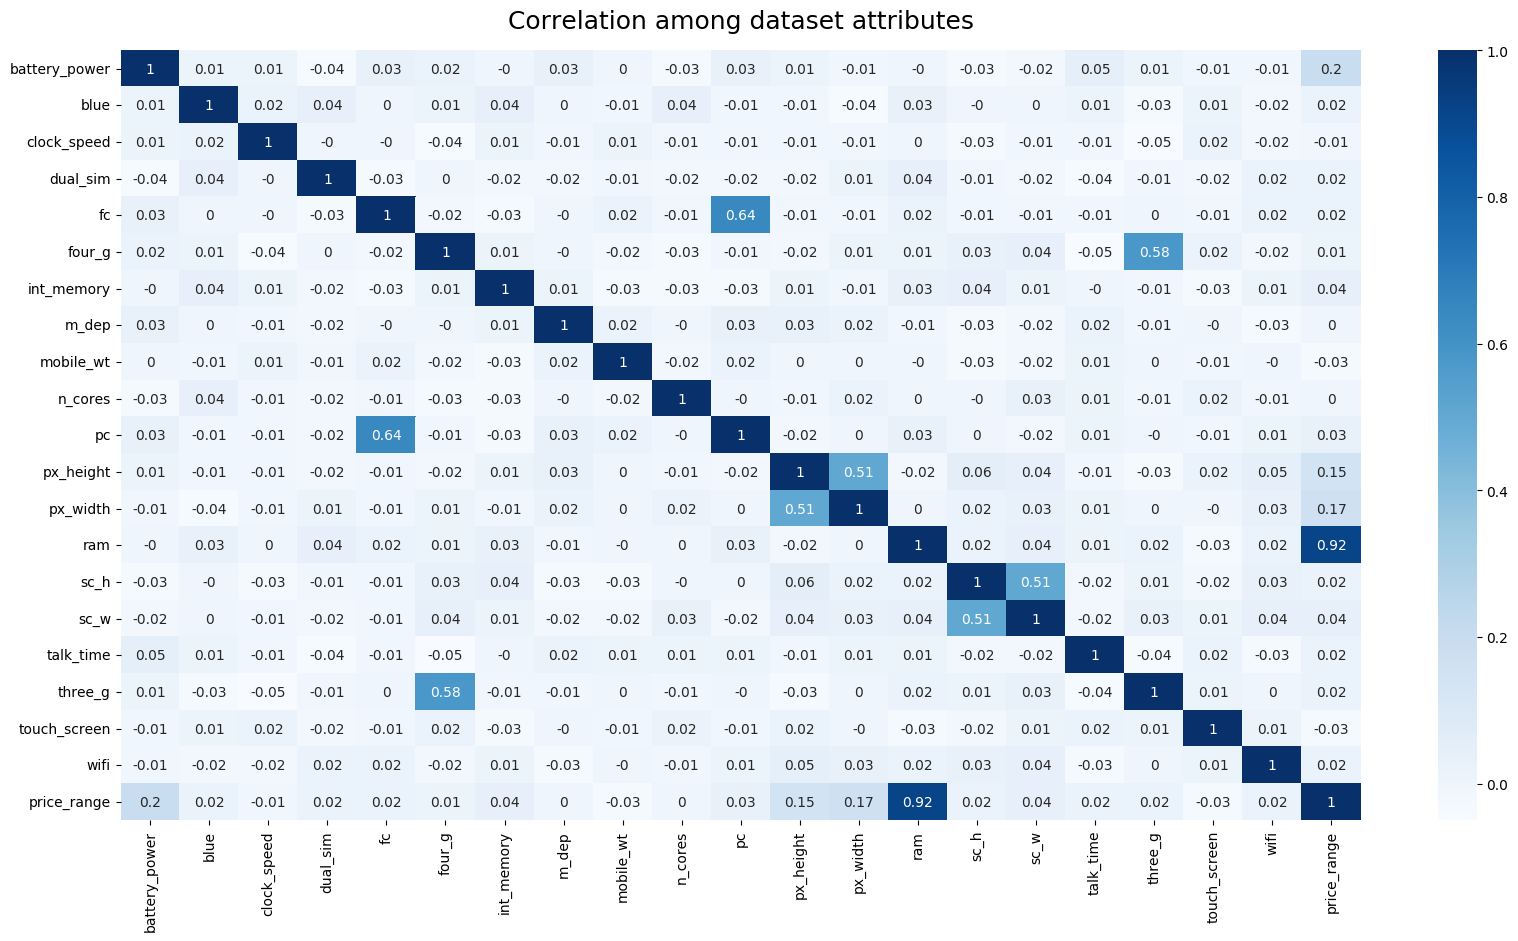

In [11]:
heatmap_total = sns.heatmap(corr_check_df, annot=True, annot_kws={'size': 10}, cmap='Blues')
heatmap_total.set_title('Correlation among dataset attributes', fontdict={'fontsize':18}, pad=16)

plt.gcf().set_size_inches(20, 10)
plt.show()

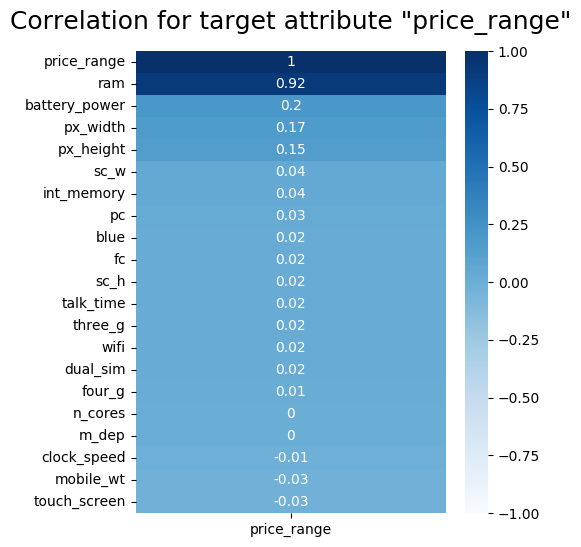

In [12]:
corr_target = corr_check_df[['price_range']].sort_values(by='price_range', ascending=False)

heatmap_target = sns.heatmap(corr_target, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap_target.set_title('Correlation for target attribute "price_range"', fontdict={'fontsize':18}, pad=16)

plt.gcf().set_size_inches(5, 6)

There is high correlation between "ram" attribute and target attribute "price_range": **0.92**

Described dataset contains multicollinearity in following attributes:
 - three_g and four_g: **0.58**
 - pc and fc: **0.64**
 - px_width and px_height: **0.51**
 - sc_w and sc_h: **0.51**

 Multicollinearity can be problematic for classification models as it can lead to inflated estimates of feature importance as well as lead to overfitting.
 <br>It is important to trear multicollinearity for training dataset. 
  <br>Since correlation between problematic attributes and target attribute "price_range" is low, they can be later ommited form trainig dataset.

***
#### Check distribution of dataset attributes
***

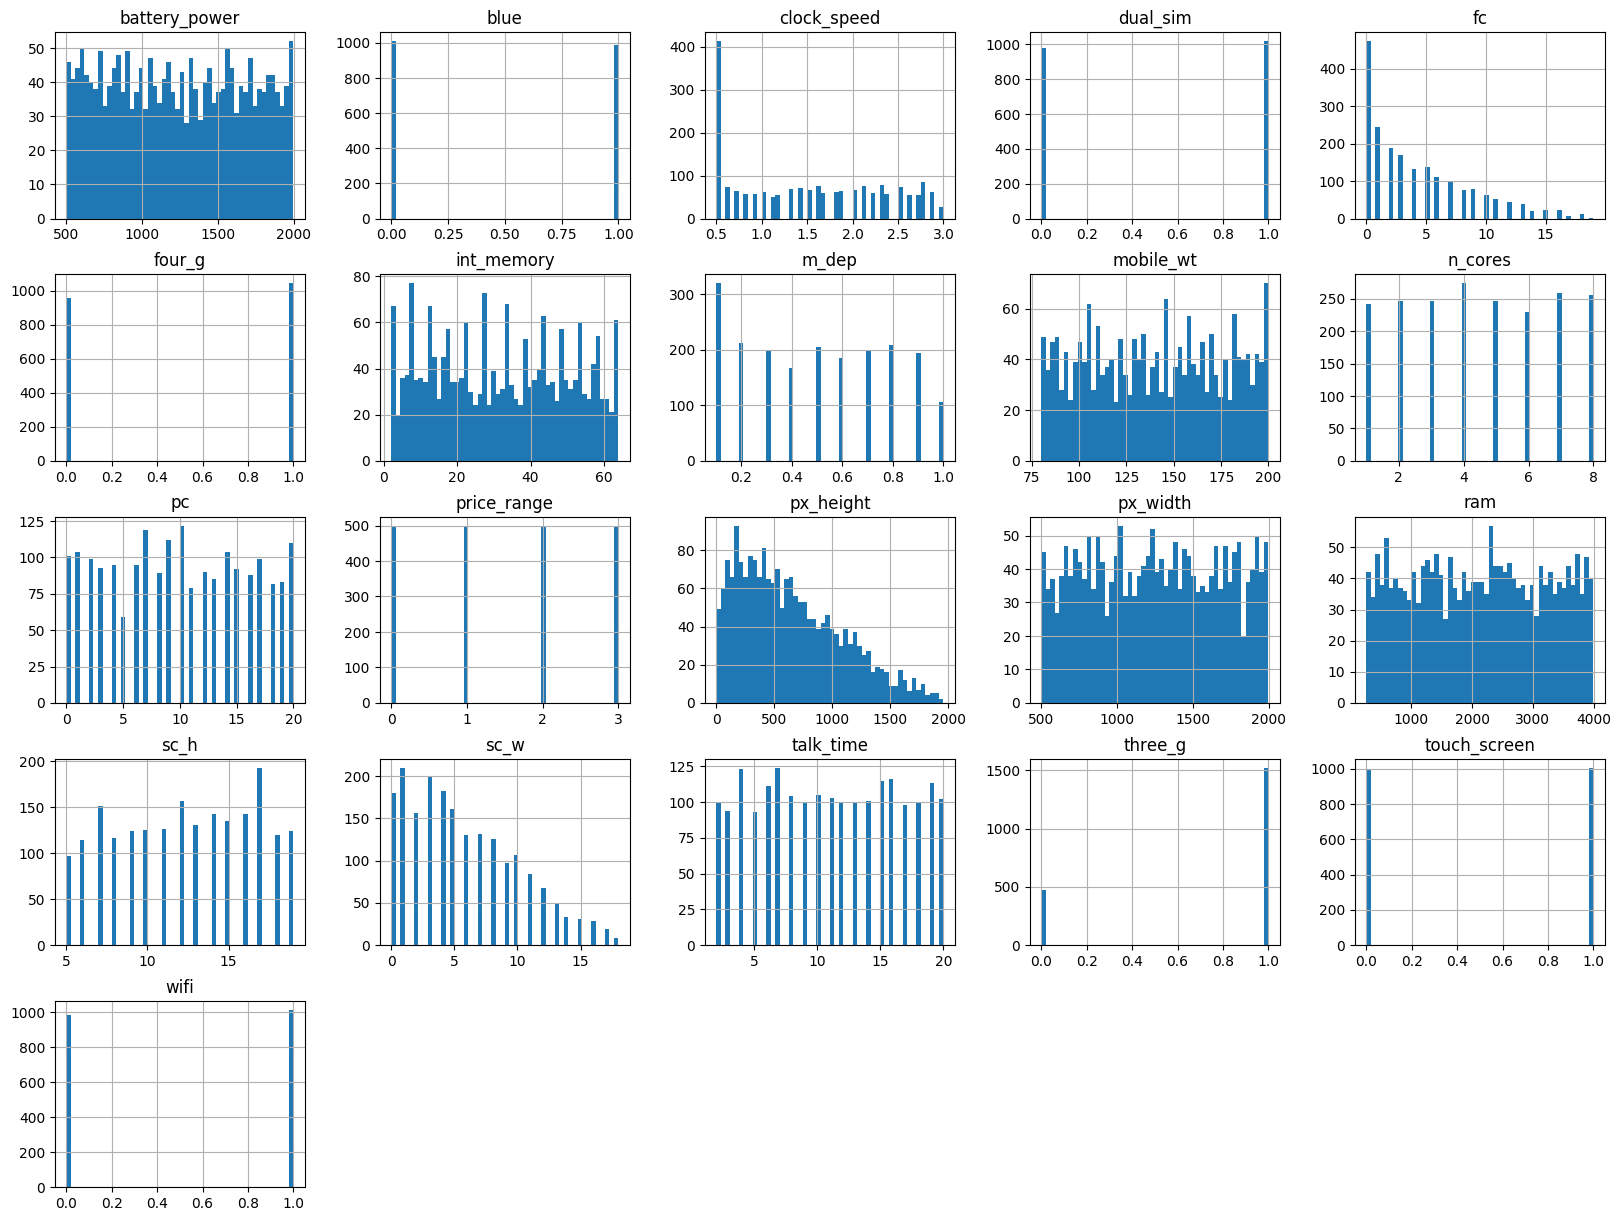

In [13]:
data_df.hist(bins=50,figsize=(20,15))
plt.show()

***
#### Check for outliers
***

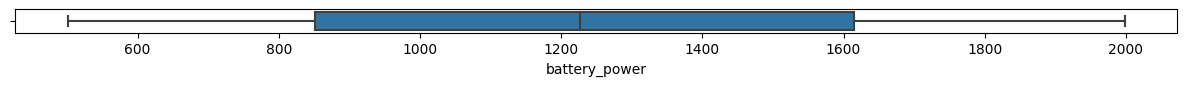

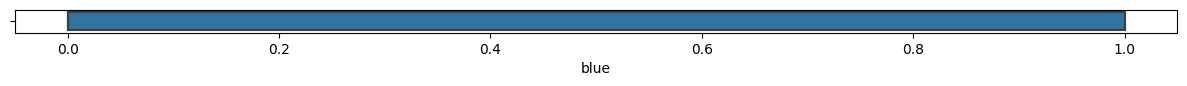

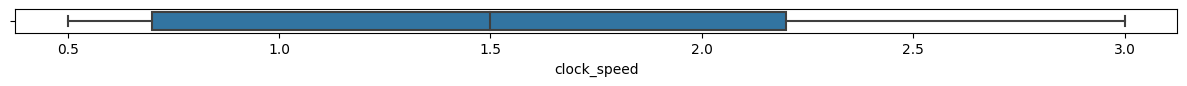

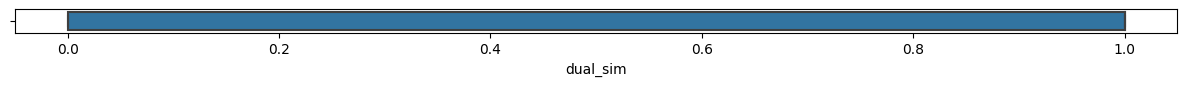

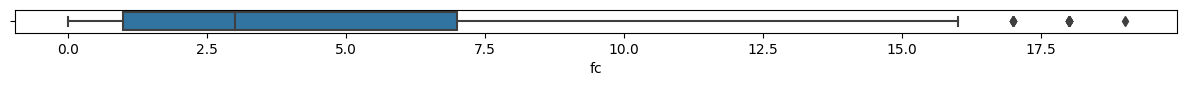

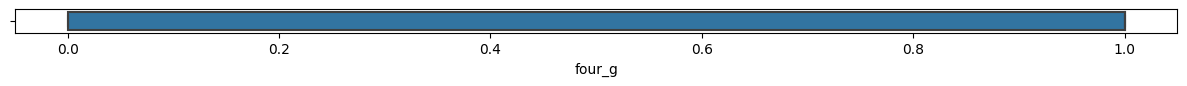

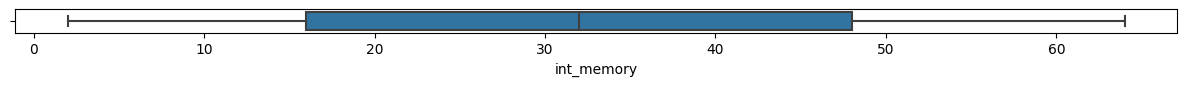

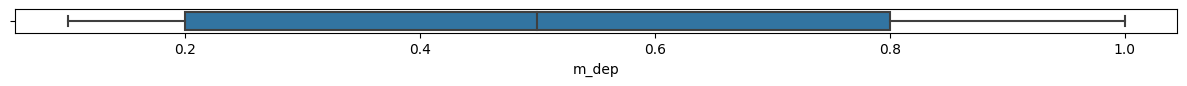

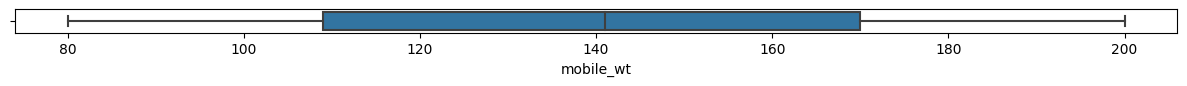

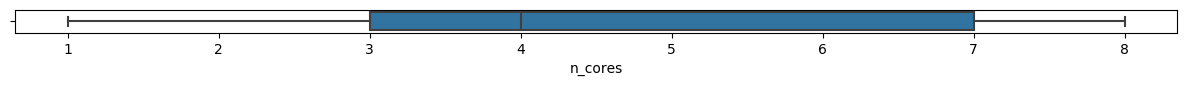

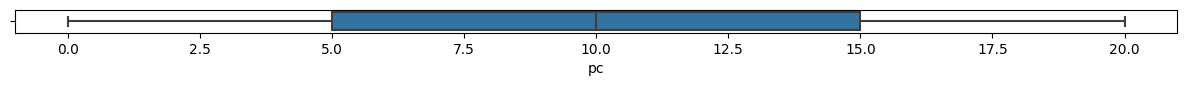

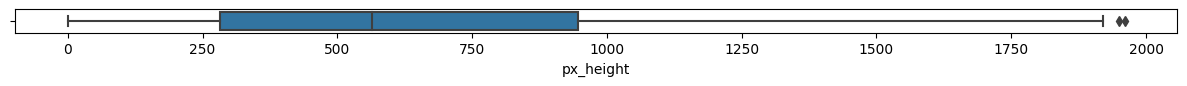

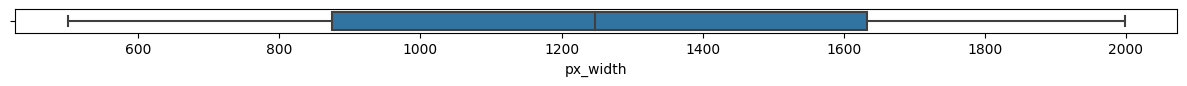

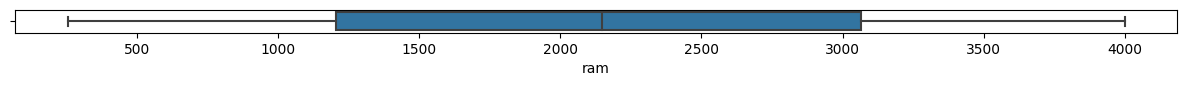

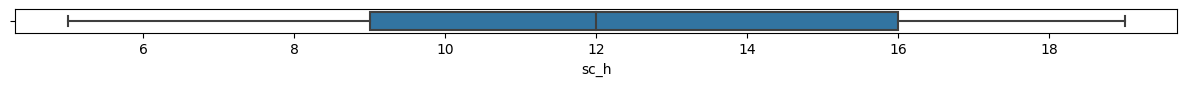

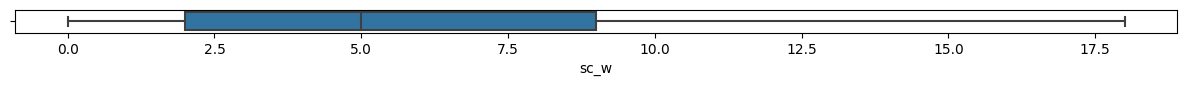

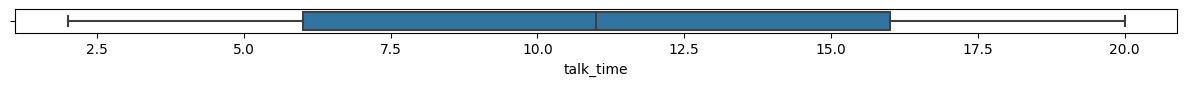

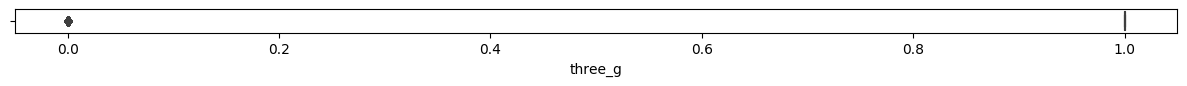

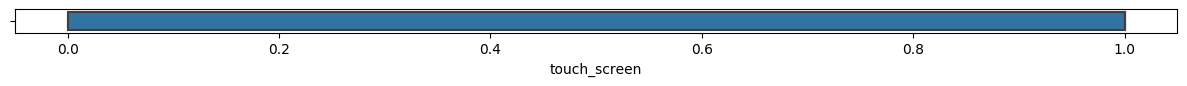

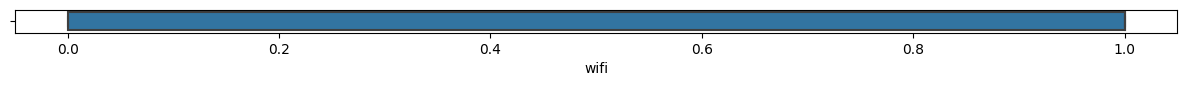

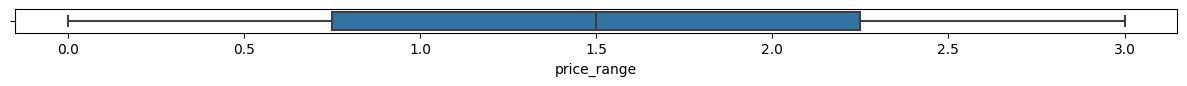

In [14]:
for column in data_df:
        plt.figure(figsize=(15,0.3))
        sns.boxplot(data=data_df, x=column)

Columns with some outliers that should be treated:
- **fc** (front camera mega pixels) 
- **px_height** (pixel resolution height)

***
#### Identify outliers
***

**Outliers for "fc" column**

In [15]:
z_score_outliers(data_df, 'fc', 3)
iqr_outliers(data_df, 'fc', 1.5)


 Possible outliers for "fc" identified with Z-Score method


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1
1416,1448,0,0.5,1,18,0,2,0.2,100,5,19,846,1144,593,9,4,18,1,1,1,0
1554,1957,0,1.2,1,18,1,36,0.8,151,2,19,1194,1727,1115,16,2,18,1,0,1,1
1693,695,0,0.5,0,18,1,12,0.6,196,2,19,1649,1829,2855,16,13,7,1,1,1,2
1705,1290,1,1.4,1,19,1,35,0.3,110,4,20,405,742,879,16,2,8,1,0,0,0
1880,1720,0,1.6,0,18,1,2,0.8,188,5,20,334,896,2522,10,5,2,1,0,1,2



 Possible outliers for "fc" identified with IQR method


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


**Outliers for "px_height" column**

In [16]:
z_score_outliers(data_df, 'px_height', 2)
iqr_outliers(data_df, 'px_height', 1.5)


 Possible outliers for "px_height" identified with Z-Score method


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
41,1646,1,2.3,0,8,1,41,0.2,185,2,10,1725,1932,3339,18,10,19,1,1,0,3
44,1195,1,2.8,0,1,1,20,0.8,110,2,14,1580,1652,504,9,3,12,1,1,0,0
66,1358,1,0.5,0,11,1,36,0.3,155,4,14,1565,1858,3068,9,4,4,1,1,0,3
90,1724,0,2.0,1,2,1,57,0.5,177,3,5,1605,1924,2822,19,3,16,1,1,0,3
97,1665,1,0.5,0,3,1,60,0.2,194,6,18,1572,1684,1601,18,17,14,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,1792,1,1.0,0,3,1,62,0.3,170,7,8,1626,1913,2563,18,14,15,1,0,1,3
1910,1872,1,1.9,0,5,0,35,0.6,111,3,14,1546,1879,2419,15,5,19,0,0,0,3
1930,732,1,1.3,0,5,1,32,0.4,163,8,7,1661,1836,3883,12,2,5,1,0,1,3
1964,1753,0,0.7,0,4,0,40,0.6,191,4,11,1652,1983,1112,8,2,15,1,1,1,1



 Possible outliers for "px_height" identified with IQR method


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


***
#### Price range representation for categorical variables
***

**Following graphs represent number of instances in each price category for categorical attributes**:
- blue
- dual_sim
- four_g
- three_g
- touch_screen
- wifi

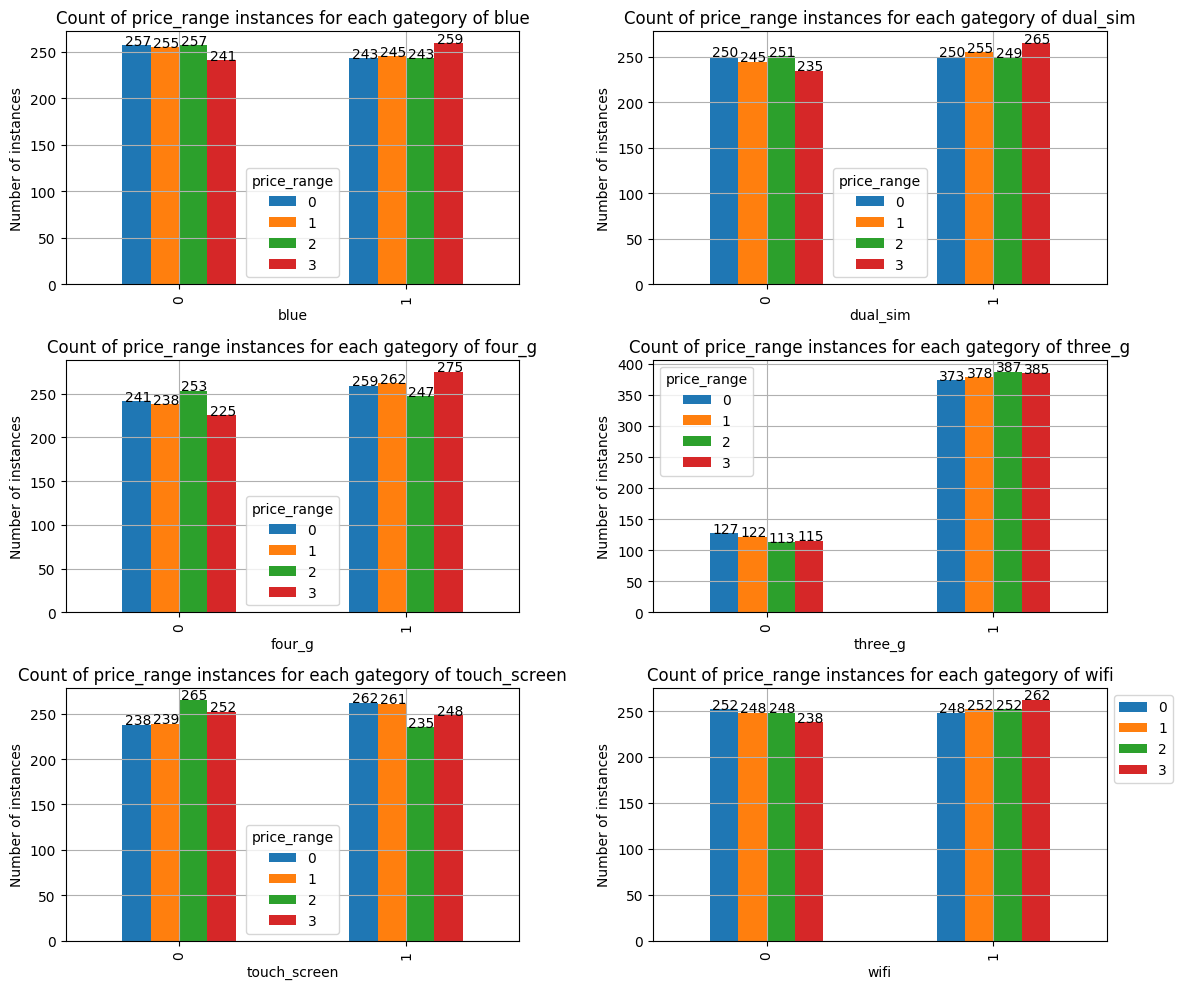

In [17]:
categorical_columns = ['blue',
                       'dual_sim',
                       'four_g',
                       'three_g',
                       'touch_screen',
                       'wifi']
col_number = len(categorical_columns)

categorical_vs_target_rep(data_df, categorical_columns, 'price_range', col_number)

### Conclusion

1. Columns **px_height** and **sc_w:** contain suspicious values of 0 and close to 0, which does nort represent reality, as described columns naturally can not contain values close to 0. It is necessary to remove either rows with incorrect values from dataset or remove columns entirely.

2. Described dataset contains multicollinearity in following attributes:
 - three_g and four_g: **0.58**
 - pc and fc: **0.64**
 - px_width and px_height: **0.51**
 - sc_w and sc_h: **0.51**
It is important to treat multicollinearity for training dataset either by omitting columns demonstarting multicollinearity or applying regularization techniques (ex. Ridge Classification, Lasso Classification)

3. Columns  **fc** (front camera mega pixels) and **px_height** (pixel resolution height) have outliers that should be treated.
<br> It can be done either by removing affected rows from dataset or replasing values with more average (ex. median, 75%) value